# Experiment 2 - Self-evaluation and ephemerality in "simple"

## Preliminary actions

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [4]:
import pickle
import random
import math

In [5]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

# Notebook variables

In [23]:
exp_number = 4

seeds = range(1,51)
n_episodes = 1
max_steps = 100


In [24]:
with open(f"./Experiment 1/max_scores.pickle", "rb") as f:
    max_scores_simple = pickle.load(f)
    print("Data loaded.")

max_scores_simple = max_scores_simple[:len(seeds)]
max_score_cooking = 5

Data loaded.


# Game generation

In [11]:
import subprocess

In [ ]:
for seed in seeds:
    subprocess.run(["tw-make", f"tw-simple",
                    "--rewards", "dense", "--goal", "detailed", "--silent", "--force",
                    "--seed", f"{seed}", "--output", f"games/{game}/seed{seed}.z8"]) 

In [ ]:
for seed in range(31,51):
    subprocess.run(["tw-make", f"tw-cooking",
                    "--go", "1", "--take", "1", "--recipe", "1", "--cut", "--cook",
                    "--seed", f"{seed}", "--force", "--output", f"games/cooking/level1-seed{seed}.z8"])

# Game playing

In [13]:
selfeval_turns = 5

In [16]:
seeds = range(31,51) # extra seeds

In [17]:
game = "simple"

for random in [False, True]:
    results_all_seeds = []
    for seed in seeds:
        results = play(LLMAgentSelfEvaluate(selfeval_turns=selfeval_turns, random_selfeval=random, verbose=False,
                log=f"./Experiment {exp_number}/logs/{game}/{"r" if random else ""}{selfeval_turns}think-seed{seed}.log"),
                f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
        results_all_seeds.append(results[0]) # only one episode
    with open(f"./Experiment {exp_number}/{"r" if random else ""}{selfeval_turns}think_{game}.pickle", "wb") as f:
        pickle.dump(results_all_seeds, f)
        print("Data pickled.")

games/simple/seed31.z8 .  	avg. steps: 100.0; avg. score:  5.0 / 8; total execution time: 321.1.
games/simple/seed32.z8 .  	avg. steps:  71.0; avg. score:  8.0 / 8; total execution time: 175.4.
games/simple/seed33.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 7; total execution time: 171.8.
games/simple/seed34.z8 .  	avg. steps:  29.0; avg. score: 10.0 / 10; total execution time: 42.9.
games/simple/seed35.z8 .  	avg. steps:  15.0; avg. score:  7.0 / 7; total execution time: 15.4.
games/simple/seed36.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10; total execution time: 226.7.
games/simple/seed37.z8 .  	avg. steps:  31.0; avg. score: 10.0 / 10; total execution time: 52.2.
games/simple/seed38.z8 .  	avg. steps:  21.0; avg. score: 10.0 / 10; total execution time: 44.4.
games/simple/seed39.z8 .  	avg. steps:   8.0; avg. score:  7.0 / 7; total execution time:  4.7.
games/simple/seed40.z8 .  	avg. steps:  11.0; avg. score:  8.0 / 8; total execution time: 10.0.
games/simple/seed41.z8 .  	avg. 

In [18]:
game = "cooking"

for random in [False, True]:
    results_all_seeds = []
    for seed in seeds:
        results = play(LLMAgentSelfEvaluate(selfeval_turns=selfeval_turns, random_selfeval=random, verbose=False,
                log=f"./Experiment {exp_number}/logs/{game}/{"r" if random else ""}{selfeval_turns}think-seed{seed}.log"),
                f"games/{game}/level1-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
        results_all_seeds.append(results[0]) # only one episode
    with open(f"./Experiment {exp_number}/{"r" if random else ""}{selfeval_turns}think_{game}.pickle", "wb") as f:
        pickle.dump(results_all_seeds, f)
        print("Data pickled.")

games/cooking/level1-seed31.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 5; total execution time: 210.6.
games/cooking/level1-seed32.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 319.1.
games/cooking/level1-seed33.z8 .  	avg. steps:  23.0; avg. score:  3.0 / 5; total execution time: 36.7.
games/cooking/level1-seed34.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 5; total execution time: 252.6.
games/cooking/level1-seed35.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 5; total execution time: 231.2.
games/cooking/level1-seed36.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 5; total execution time: 207.6.
games/cooking/level1-seed37.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 5; total execution time: 271.0.
games/cooking/level1-seed38.z8 .  	avg. steps: 100.0; avg. score:  5.0 / 5; total execution time: 398.6.
games/cooking/level1-seed39.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5; total execution time: 280.8.
games/cooking/level1-seed40.z8 .  	avg. steps: 100.0; av

# Data aggregation for visualization

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
final_arrays = {"simple": [], "cooking": []}
for game in final_arrays.keys():
    for random in [False, True]:
        with open(f"./Experiment {exp_number}/{"r" if random else ""}{selfeval_turns}think_{game}.pickle", "rb") as f:
            results = pickle.load(f)
        final_scores = [run[-1][1] for run in results]
        if game == "simple":
            final_scores_normalized = np.array(final_scores) / np.array(max_scores_simple)
        elif game == "cooking":
            final_scores_normalized = np.array(final_scores) / max_score_cooking
        final_arrays[game].append(final_scores_normalized)

# Visualization

In [96]:
means = []
medians = []
for game in final_arrays.keys():
    for arrays in final_arrays[game]:
        means.append(np.mean(arrays))
        medians.append(np.median(arrays))

In [122]:
print(len(means))

4


/tmp/ipykernel_21564/27667344.py:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  swarm = sns.swarmplot(
/tmp/ipykernel_21564/27667344.py:47: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  violin = sns.violinplot(x=grouping, hue=subgrouping, y=data_combined,
/tmp/ipykernel_21564/27667344.py:54: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  violin = sns.violinplot(x=grouping, hue=subgrouping, y=data_combined,
/tmp/ipykernel_21564/27667344.py:62: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  scatter1 = sns.swarmplot(x=grouping_means_medians, hue=subgrouping_means, y=means,
/tmp/ipykernel_21564/27667344.py:69: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  scatter1 = sns.swarmplot(x=grouping_means_medians, hue=subgrouping_medians, y=median

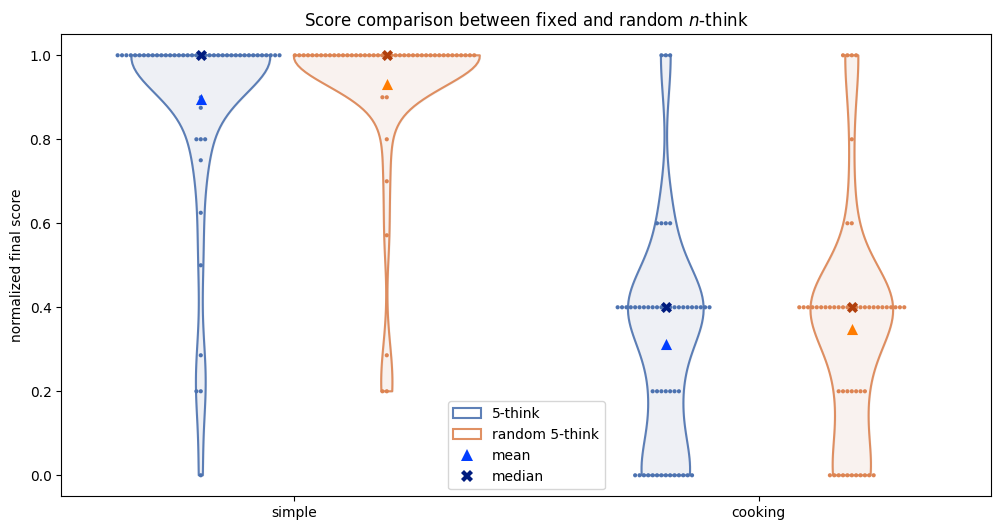

In [150]:
fig, ax = plt.subplots(figsize=(12,6))

data_combined = np.concatenate([final_arrays["simple"][0], final_arrays["simple"][1], final_arrays["cooking"][0], final_arrays["cooking"][1]])
array_length = len(final_arrays["simple"][0])

grouping_labels = ["simple", "cooking"] 
subgrouping_labels = ["5-think", "random 5-think"]
grouping = [grouping_labels[0]] * 2*array_length + [grouping_labels[1]] * 2*array_length
subgrouping = [subgrouping_labels[0]] * array_length + [subgrouping_labels[1]] * array_length + \
            [subgrouping_labels[0]] * array_length + [subgrouping_labels[1]] * array_length
grouping_means_medians = [grouping_labels[0]] * 2*1 + [grouping_labels[1]] * 2*1
subgrouping_means = ["mean"] * 1 + ["_"] * 1 + \
            ["mean"] * 1 + ["_"] * 1
subgrouping_medians = ["median"] * 1 + ["_"] * 1 + \
            ["median"] * 1 + ["_"] * 1

custom_palette = {"pure reasoning": "#c44e52", "ephemeral 1-think": "#dd8452", "non-ephemeral 1-think": "#55a868"}

swarm = sns.swarmplot(
    x=grouping, hue=subgrouping, y=data_combined,
    ax=ax,
    palette=sns.color_palette("deep"),
    size=3,
    dodge=True,
    legend=False
)

# strip = sns.stripplot(
#     x=grouping, hue=subgrouping, y=data_combined,
#     ax=ax,
#     palette=sns.color_palette("deep"),
#     legend=False,
#     dodge=True, alpha=0.2, jitter=0.01
# )

# box = sns.boxplot(x=grouping, hue=subgrouping, y=data_combined,
#                   boxprops={"alpha": 0.1},
#                   showfliers=False,
#                   whis=0,
#                   width=0.8, gap=0.2,
#                   palette=sns.color_palette("deep"),
#                   showmeans=True,
#                   medianprops={"color": "black", "linewidth": 2, "alpha": 0.5},
#                   legend=False
#                   )

violin = sns.violinplot(x=grouping, hue=subgrouping, y=data_combined,
                        cut=0, inner=None, fill=True,
                        palette=sns.color_palette("deep"), alpha=0.1,
                        legend=False,
                        common_norm=True,
                        bw_method="scott", bw_adjust=0.8
                       )
violin = sns.violinplot(x=grouping, hue=subgrouping, y=data_combined,
                        cut=0, inner=None, fill=False,
                        palette=sns.color_palette("deep"), alpha=0.9,
                        legend=True,
                        common_norm=True,
                        bw_method="scott", bw_adjust=0.8
                        )

scatter1 = sns.swarmplot(x=grouping_means_medians, hue=subgrouping_means, y=means,
                        legend=True,
                        dodge=True,
                        palette=sns.color_palette("bright"),
                         marker="^",
                         size=8
                        )
scatter1 = sns.swarmplot(x=grouping_means_medians, hue=subgrouping_medians, y=medians,
                        legend=True,
                        dodge=True,
                         palette=sns.color_palette("dark"),
                         marker="X",
                         size=8
                        )

ax.set_title(f"Score comparison between fixed and random $n$-think")
ax.set_ylabel("normalized final score")
plt.show()